Continuous Integration
================

Continuous Integration (CI), is a software development technique where all developers send their code to a central repository. There it passes through a process of build and testing. It's objectives are find and investigate bugs quicker and therefore enhance code quality and also diminishing the time it takes to validate and release new features.


## How does it work?

Normally, developers use a version control system, such as git. Before submitted their code to code repositories A CI server is integrated with these code buckets in order to run the tests automatically, alongside with building the system, and may display errors right away. 

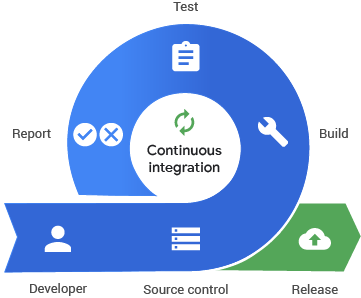

This way, the code changes are created, tested and prepared automatically, so that the production is facilitated. 

For visual learners, Fireship has a great (2 min) video about the topic: [CI/CD Explained](https://www.youtube.com/watch?v=scEDHsr3APg&ab_channel=Fireship)





## Hands On: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/damorimRG/practical_testing_book/blob/master/testregression/continuousintegration.ipynb)

Now let's create the whole chain of steps necessary to use CI. For this exercise you'll need know the basics of Git and Python. We will be using Github and CircleCI as our integration services and Linux and Python as our platforms.
As such, some basic steps need to be taken: A repository on github, a virtual working enviroment a simple example code and tests for the code.

1º: You will need to create a new repository on Github and call it CI_example and then clone the repository to your machine. (**this is essential for the code below to work properly**)

In [ ]:
### 2º: Creating a working enviroment

!apt-get install python3-venv
!python3 -m venv Calculator
!. Calculator/bin/activate


### 3º: Writing some simple code on python and calling it calc:

!touch calc.py

!echo def add(x, y): >> calc.py
!echo return x + y >> calc.py

!echo def subtract(x, y): >> calc.py
!echo return x - y >> calc.py
        
!echo def multiply(x, y): >> calc.py
!echo return x * y >> calc.py
        
!echo def divide(x, y): >> calc.py
!echo return x / y >> calc.py


# Commit code to your repo.
!cd CI_example
!git add calc.py
!git commit -m


### 4º: Writing some tests for the code on python and calling it calc_tests:

!touch calc_tests.py

!echo import calc >> calc.py


!echo class test: >> calc.py

!echo def test_addition(self): >> calc.py
!echo assert 4 == calculator.add(2, 2) >> calc.py

!echo def test_subtraction(self): >> calc.py
!echo assert 2 == calculator.subtract(4, 2) >> calc.py
            
!echo def test_multiplication(self): >> calc.py
!echo assert 100 == calculator.multiply(10, 10) >> calc.py
            
!echo def test_division(self): >> calc.py
!echo assert 5 == calculator.divide(25, 5) >> calc.py


# For testing we will use pytest.
!pip install pytest

# Normally, you would now use "$ pytest -v" to test your code. Instead we shall commit the tests to the Github repository.
!git add calc_tests.py
!git commit -m
!git push


5º: Finally, let's integrate your codes and your Github to CircleCI! For this you need to create a .circleci folder in your repository and a config.yml file with the following code inside:

In [ ]:
version: 2
jobs:
    
  build:
      
    docker:
        
      - image: circleci/python:3.7

    working_directory: ~/repo

    steps:
        
      - checkout
          
      - run:
          
          name: virtual enviroment start
          command: |
            python3 -m venv venv
            . venv/bin/activate
            pip install -r requirements.txt
                
      - run:
          
          name: test
          command: |
            . venv/bin/activate
            pytest -v=calc

6º: Now commit some changes to the code and voilá! All pushes made will trigger your test_calculator.py and the results will be visible on CircleCI, at Jobs.

## Why it helps?

- Enhance developers productivity. It makes the team more productive once the CI process is all made automatically.

- With tests being made more often, bugs are discovered earlier, before scaling.

- Features can be released more often, knowing they won't break the application.

- You will have to spend less resources on fixing others code so you can integrate your own code to the build.

**Some examples of Continuous Integration Servers**
- [CircleCI](https://circleci.com/)
- [TravisCI](https://travis-ci.org/)
- [Jenkins](https://www.jenkins.io/)
- [GitHub Actions](https://github.com/features/actions)